# Performing Text Classification on dataset ecommerce.csv 

**Importing necessary libraries**

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,GRU,SimpleRNN,Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Reading the dataset and displaying first five rows

In [5]:
df=pd.read_csv('/ecommerce (2).csv')
df.head()

,Unnamed: 0,label,text
0,14,Household,Indianara Motivational Square Synthetic Wood A...
1,24,Household,Indianara Motivational Square Synthetic Wood A...
2,35,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."
3,42,Household,Sehaz Artworks Home-Side-Shelf-WT-KeyHolder Wo...
4,43,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."


In [6]:
df.shape

(11719, 3)

Dropping unnecessary column

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Checking null values

In [8]:
df.isnull().sum()

label    0
text     0
dtype: int64

Checking number of categories with values in label column

In [9]:
df['label'].value_counts()

Books                     4186
Household                 3256
Clothing & Accessories    2433
Electronics               1844
Name: label, dtype: int64

Checking duplicate rows

In [10]:
df.duplicated().sum()

5135

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.head(2)

,label,text
0,Household,Indianara Motivational Square Synthetic Wood A...
2,Household,"SAF 'Ganesha' Framed Painting (Wood, 12 inch x..."


Collecting all different categories data in 4 seperate variables to display using WordCloud

In [14]:
Books=" ".join(df[df['label']=='Books']['text'])
Household=" ".join(df[df['label']=='Household']['text'])
Clothing_Accessories=" ".join(df[df['label']=='Clothing & Accessories']['text'])
Electronics=" ".join(df[df['label']=='Electronics']['text'])

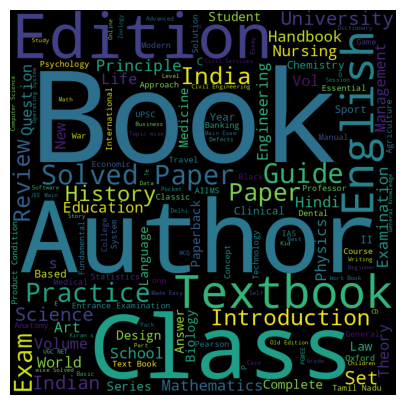

In [14]:
wc=WordCloud(width=800,height=800,background_color='black',min_font_size=10)
wc.generate(Books)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis('off')
plt.show()


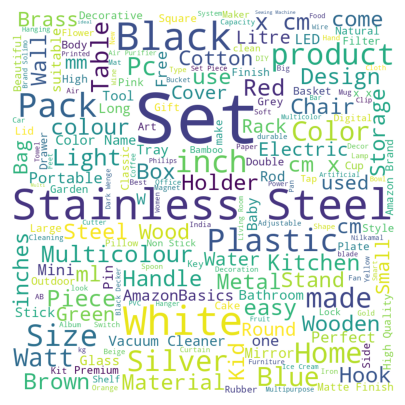

In [15]:
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(Household)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

Seperating the two columns in X and Y

In [15]:
X=df['text']
Y=df['label']


Using LabelEncoder to convert characters into numerical data
i.e 1,2,3,4 since we have 4 categories

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

Using one hot encoding to again convert the numbers into 1 and 0

In [17]:
Y=np_utils.to_categorical(Y,num_classes=4)


In [19]:
print(Y[:10])

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


 Applying train test split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

Converting words into tokens using Tokenizer

In [21]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)

In [22]:
vocabulary=tokenizer.index_word
vocab_length=len(vocabulary)

print(vocab_length)

11802


Converting dictionary to a sequence of integers

In [23]:
train_sequence=tokenizer.texts_to_sequences(X_train)


In [24]:
doc_length=[]
for doc in train_sequence:
  doc_length.append(len(doc))
print(doc_length)  

[25, 10, 16, 29, 17, 5, 1, 5, 26, 5, 12, 29, 10, 8, 2, 11, 35, 8, 2, 3, 15, 24, 34, 12, 2, 22, 5, 15, 24, 5, 8, 12, 16, 24, 13, 7, 22, 24, 18, 4, 7, 22, 17, 17, 12, 17, 17, 6, 30, 28, 8, 11, 22, 22, 8, 32, 14, 20, 11, 6, 15, 19, 73, 13, 30, 17, 15, 8, 28, 9, 29, 6, 3, 19, 30, 32, 3, 14, 26, 25, 20, 31, 6, 37, 13, 13, 27, 19, 34, 7, 8, 10, 5, 31, 11, 11, 6, 10, 5, 12, 6, 6, 15, 13, 15, 3, 18, 26, 4, 16, 23, 30, 14, 15, 22, 8, 2, 18, 7, 7, 7, 6, 26, 26, 6, 6, 16, 62, 21, 29, 13, 12, 25, 32, 5, 16, 22, 23, 25, 16, 5, 6, 4, 5, 14, 5, 9, 7, 16, 30, 15, 13, 13, 18, 5, 24, 5, 23, 6, 27, 16, 16, 17, 34, 8, 17, 12, 10, 28, 19, 11, 30, 4, 19, 14, 64, 10, 12, 22, 13, 24, 3, 9, 7, 8, 31, 14, 19, 18, 18, 34, 15, 17, 12, 3, 28, 19, 12, 27, 5, 14, 22, 16, 11, 7, 9, 2, 25, 13, 32, 4, 26, 9, 6, 23, 23, 25, 26, 23, 22, 12, 20, 7, 5, 34, 22, 32, 22, 26, 18, 13, 38, 5, 8, 22, 19, 15, 13, 24, 21, 8, 12, 26, 17, 19, 11, 15, 22, 32, 20, 15, 8, 6, 6, 29, 19, 19, 4, 6, 11, 24, 24, 28, 7, 57, 28, 10, 29, 22, 27

In [25]:
max(doc_length)

271

Getting the value of maximum document length of 99% of the documents

In [26]:
print(np.quantile(doc_length,0.95))
print(np.quantile(doc_length,0.99))

33.0
53.0


In [27]:
max_length=53

Performing padding operation on all the documents to get equal length of all documents

In [28]:
train_matrix=sequence.pad_sequences(train_sequence,maxlen=max_length)


Performing same operations on input testing data except for fitting

In [29]:
test_sequence=tokenizer.texts_to_sequences(X_test)
test_matrix=sequence.pad_sequences(test_sequence,maxlen=max_length)


Creating RNN model and training the data
Generating Classification report

In [29]:
model=Sequential()
model.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,
                mask_zero=True))
model.add(SimpleRNN(64))
model.add(Dense(units=32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='tanh'))

model.add(Dense(units=4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')



In [30]:
model.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 17s 284ms/step - loss: 1.1762
Epoch 2/10
36/36 [==============================] - 9s 253ms/step - loss: 0.5048
Epoch 3/10
36/36 [==============================] - 7s 200ms/step - loss: 0.2120
Epoch 4/10
36/36 [==============================] - 7s 179ms/step - loss: 0.0937
Epoch 5/10
36/36 [==============================] - 7s 191ms/step - loss: 0.0445
Epoch 6/10
36/36 [==============================] - 5s 144ms/step - loss: 0.0274
Epoch 7/10
36/36 [==============================] - 6s 161ms/step - loss: 0.0183
Epoch 8/10
36/36 [==============================] - 4s 120ms/step - loss: 0.0138
Epoch 9/10
36/36 [==============================] - 4s 104ms/step - loss: 0.0106
Epoch 10/10
36/36 [==============================] - 4s 105ms/step - loss: 0.0087


In [31]:
Y_pred=model.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       707
           1       0.93      0.90      0.92       447
           2       0.89      0.81      0.85       316
           3       0.88      0.87      0.88       506

   micro avg       0.91      0.90      0.91      1976
   macro avg       0.91      0.89      0.90      1976
weighted avg       0.91      0.90      0.90      1976
 samples avg       0.90      0.90      0.90      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Bidirectional RNN model and training the data
Generating Classification report

In [32]:
model1=Sequential()
model1.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model1.add(Bidirectional(SimpleRNN(64)))

model1.add(Dense(units=32,activation='tanh'))
model1.add(Dropout(0.2))
model1.add(Dense(units=16,activation='tanh'))
model1.add(Dense(units=4,activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy')


In [33]:
model1.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
72/72 [==============================] - 26s 305ms/step - loss: 0.8610
Epoch 2/10
72/72 [==============================] - 17s 228ms/step - loss: 0.2231
Epoch 3/10
72/72 [==============================] - 14s 190ms/step - loss: 0.0571
Epoch 4/10
72/72 [==============================] - 11s 159ms/step - loss: 0.0195
Epoch 5/10
72/72 [==============================] - 11s 155ms/step - loss: 0.0099
Epoch 6/10
72/72 [==============================] - 10s 145ms/step - loss: 0.0069
Epoch 7/10
72/72 [==============================] - 8s 115ms/step - loss: 0.0051
Epoch 8/10
72/72 [==============================] - 9s 131ms/step - loss: 0.0042
Epoch 9/10
72/72 [==============================] - 9s 127ms/step - loss: 0.0034
Epoch 10/10
72/72 [==============================] - 9s 118ms/step - loss: 0.0029


In [34]:
Y_pred=model1.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       707
           1       0.96      0.95      0.95       447
           2       0.90      0.82      0.86       316
           3       0.91      0.91      0.91       506

   micro avg       0.93      0.92      0.93      1976
   macro avg       0.93      0.91      0.92      1976
weighted avg       0.93      0.92      0.93      1976
 samples avg       0.92      0.92      0.92      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Multilayer RNN model and training the data
Generating Classification report

In [35]:
model2=Sequential()
model2.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model2.add(SimpleRNN(64,return_sequences=True))
model2.add(SimpleRNN(64,return_sequences=True))
model2.add(SimpleRNN(64))

model2.add(Dense(units=32,activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(units=16,activation='tanh'))
model2.add(Dense(units=4,activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy')

model2.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
72/72 [==============================] - 28s 321ms/step - loss: 0.8624
Epoch 2/10
72/72 [==============================] - 18s 247ms/step - loss: 0.2628
Epoch 3/10
72/72 [==============================] - 15s 213ms/step - loss: 0.1006
Epoch 4/10
72/72 [==============================] - 13s 178ms/step - loss: 0.0637
Epoch 5/10
72/72 [==============================] - 14s 194ms/step - loss: 0.0880
Epoch 6/10
72/72 [==============================] - 14s 197ms/step - loss: 0.0748
Epoch 7/10
72/72 [==============================] - 13s 184ms/step - loss: 0.0262
Epoch 8/10
72/72 [==============================] - 13s 178ms/step - loss: 0.0248
Epoch 9/10
72/72 [==============================] - 12s 173ms/step - loss: 0.0138
Epoch 10/10
72/72 [==============================] - 12s 172ms/step - loss: 0.0084


In [36]:
Y_pred=model2.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 2s 22ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       707
           1       0.96      0.91      0.93       447
           2       0.87      0.78      0.83       316
           3       0.84      0.91      0.87       506

   micro avg       0.90      0.89      0.90      1976
   macro avg       0.90      0.88      0.89      1976
weighted avg       0.90      0.89      0.90      1976
 samples avg       0.89      0.89      0.89      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating LSTM model and training the data
Generating Classification report

In [37]:
model3=Sequential()
model3.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model3.add(LSTM(64))

model3.add(Dense(units=32,activation='tanh'))
model3.add(Dropout(0.2))
model3.add(Dense(units=16,activation='tanh'))
model3.add(Dense(units=4,activation='softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy')

model3.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
72/72 [==============================] - 35s 408ms/step - loss: 0.9008
Epoch 2/10
72/72 [==============================] - 12s 165ms/step - loss: 0.2024
Epoch 3/10
72/72 [==============================] - 10s 143ms/step - loss: 0.0677
Epoch 4/10
72/72 [==============================] - 8s 113ms/step - loss: 0.0264
Epoch 5/10
72/72 [==============================] - 7s 103ms/step - loss: 0.0145
Epoch 6/10
72/72 [==============================] - 6s 89ms/step - loss: 0.0105
Epoch 7/10
72/72 [==============================] - 6s 87ms/step - loss: 0.0086
Epoch 8/10
72/72 [==============================] - 6s 84ms/step - loss: 0.0065
Epoch 9/10
72/72 [==============================] - 6s 81ms/step - loss: 0.0094
Epoch 10/10
72/72 [==============================] - 6s 83ms/step - loss: 0.0063


In [38]:
Y_pred=model3.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 3s 14ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       707
           1       0.98      0.95      0.96       447
           2       0.95      0.85      0.90       316
           3       0.90      0.93      0.91       506

   micro avg       0.94      0.94      0.94      1976
   macro avg       0.94      0.92      0.93      1976
weighted avg       0.94      0.94      0.94      1976
 samples avg       0.94      0.94      0.94      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Bidirectional LSTM model and training the data
Generating Classification report

In [39]:
model4=Sequential()
model4.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model4.add(Bidirectional(LSTM(64)))

model4.add(Dense(units=32,activation='tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(units=16,activation='tanh'))
model4.add(Dense(units=4,activation='softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy')

model4.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
36/36 [==============================] - 22s 358ms/step - loss: 1.1046
Epoch 2/10
36/36 [==============================] - 10s 280ms/step - loss: 0.3489
Epoch 3/10
36/36 [==============================] - 10s 291ms/step - loss: 0.1056
Epoch 4/10
36/36 [==============================] - 9s 257ms/step - loss: 0.0504
Epoch 5/10
36/36 [==============================] - 7s 195ms/step - loss: 0.0292
Epoch 6/10
36/36 [==============================] - 7s 186ms/step - loss: 0.0190
Epoch 7/10
36/36 [==============================] - 8s 227ms/step - loss: 0.0141
Epoch 8/10
36/36 [==============================] - 7s 196ms/step - loss: 0.0105
Epoch 9/10
36/36 [==============================] - 8s 210ms/step - loss: 0.0086
Epoch 10/10
36/36 [==============================] - 5s 150ms/step - loss: 0.0074


In [40]:
Y_pred=model4.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 5s 37ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       707
           1       0.97      0.96      0.96       447
           2       0.91      0.87      0.89       316
           3       0.91      0.93      0.92       506

   micro avg       0.94      0.94      0.94      1976
   macro avg       0.94      0.93      0.93      1976
weighted avg       0.94      0.94      0.94      1976
 samples avg       0.94      0.94      0.94      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Multilayer LSTM model and training the data
Generating Classification report

In [41]:
model5=Sequential()
model5.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model5.add(LSTM(64,return_sequences=True))
model5.add(LSTM(64,return_sequences=True))
model5.add(LSTM(64))
model5.add(Dense(units=32,activation='tanh'))
model5.add(Dropout(0.2))
model5.add(Dense(units=16,activation='tanh'))
model5.add(Dense(units=4,activation='softmax'))

model5.compile(optimizer='adam',loss='categorical_crossentropy')

model5.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
72/72 [==============================] - 38s 359ms/step - loss: 0.8458
Epoch 2/10
72/72 [==============================] - 21s 288ms/step - loss: 0.2837
Epoch 3/10
72/72 [==============================] - 19s 261ms/step - loss: 0.1204
Epoch 4/10
72/72 [==============================] - 17s 234ms/step - loss: 0.0739
Epoch 5/10
72/72 [==============================] - 18s 253ms/step - loss: 0.0506
Epoch 6/10
72/72 [==============================] - 20s 278ms/step - loss: 0.0315
Epoch 7/10
72/72 [==============================] - 17s 239ms/step - loss: 0.0386
Epoch 8/10
72/72 [==============================] - 16s 218ms/step - loss: 0.0262
Epoch 9/10
72/72 [==============================] - 15s 214ms/step - loss: 0.0198
Epoch 10/10
72/72 [==============================] - 15s 215ms/step - loss: 0.0412


In [42]:
Y_pred=model5.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 7s 36ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       707
           1       0.98      0.91      0.94       447
           2       0.85      0.84      0.85       316
           3       0.85      0.89      0.87       506

   micro avg       0.91      0.91      0.91      1976
   macro avg       0.90      0.90      0.90      1976
weighted avg       0.91      0.91      0.91      1976
 samples avg       0.91      0.91      0.91      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating GRU model and training the data
Generating Classification report

In [43]:
model6=Sequential()
model6.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model6.add(GRU(64))

model6.add(Dense(units=32,activation='tanh'))
model6.add(Dropout(0.2))
model6.add(Dense(units=16,activation='tanh'))
model6.add(Dense(units=4,activation='softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy')

model6.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
36/36 [==============================] - 15s 272ms/step - loss: 1.2061
Epoch 2/10
36/36 [==============================] - 7s 185ms/step - loss: 0.5287
Epoch 3/10
36/36 [==============================] - 7s 202ms/step - loss: 0.1640
Epoch 4/10
36/36 [==============================] - 5s 153ms/step - loss: 0.0494
Epoch 5/10
36/36 [==============================] - 6s 171ms/step - loss: 0.0274
Epoch 6/10
36/36 [==============================] - 5s 139ms/step - loss: 0.0209
Epoch 7/10
36/36 [==============================] - 4s 107ms/step - loss: 0.0148
Epoch 8/10
36/36 [==============================] - 6s 151ms/step - loss: 0.0103
Epoch 9/10
36/36 [==============================] - 4s 99ms/step - loss: 0.0081
Epoch 10/10
36/36 [==============================] - 3s 96ms/step - loss: 0.0069


In [44]:
Y_pred=model6.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 3s 23ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       707
           1       0.96      0.95      0.95       447
           2       0.94      0.83      0.88       316
           3       0.88      0.92      0.90       506

   micro avg       0.93      0.92      0.93      1976
   macro avg       0.93      0.91      0.92      1976
weighted avg       0.93      0.92      0.93      1976
 samples avg       0.92      0.92      0.92      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Bidirectional GRU model and training the data
Generating Classification report

In [45]:
model7=Sequential()
model7.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model7.add(Bidirectional(GRU(64)))

model7.add(Dense(units=32,activation='tanh'))
model7.add(Dropout(0.2))
model7.add(Dense(units=16,activation='tanh'))
model7.add(Dense(units=4,activation='softmax'))
model7.compile(optimizer='adam',loss='categorical_crossentropy')

model7.fit(train_matrix,Y_train,epochs=10,batch_size=64)

Epoch 1/10
72/72 [==============================] - 30s 291ms/step - loss: 0.8957
Epoch 2/10
72/72 [==============================] - 18s 252ms/step - loss: 0.1565
Epoch 3/10
72/72 [==============================] - 13s 181ms/step - loss: 0.0363
Epoch 4/10
72/72 [==============================] - 14s 187ms/step - loss: 0.0136
Epoch 5/10
72/72 [==============================] - 12s 170ms/step - loss: 0.0085
Epoch 6/10
72/72 [==============================] - 11s 155ms/step - loss: 0.0054
Epoch 7/10
72/72 [==============================] - 11s 150ms/step - loss: 0.0039
Epoch 8/10
72/72 [==============================] - 11s 159ms/step - loss: 0.0034
Epoch 9/10
72/72 [==============================] - 11s 150ms/step - loss: 0.0026
Epoch 10/10
72/72 [==============================] - 11s 152ms/step - loss: 0.0022


In [46]:
Y_pred=model7.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 5s 33ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       707
           1       0.96      0.97      0.96       447
           2       0.93      0.85      0.89       316
           3       0.91      0.93      0.92       506

   micro avg       0.94      0.94      0.94      1976
   macro avg       0.94      0.93      0.93      1976
weighted avg       0.94      0.94      0.94      1976
 samples avg       0.94      0.94      0.94      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating Multilayer GRU model and training the data
Generating Classification report

In [47]:
model8=Sequential()
model8.add(Embedding(input_dim=vocab_length+1,output_dim=100,input_length=max_length,mask_zero=True))
model8.add(GRU(64,return_sequences=True))
model8.add(GRU(64,return_sequences=True))
model8.add(GRU(64))

model8.add(Dense(units=32,activation='tanh'))
model8.add(Dropout(0.2))
model8.add(Dense(units=16,activation='tanh'))
model8.add(Dense(units=4,activation='softmax'))
model8.compile(optimizer='adam',loss='categorical_crossentropy')

model8.fit(train_matrix,Y_train,epochs=10,batch_size=128)

Epoch 1/10
36/36 [==============================] - 25s 380ms/step - loss: 1.0733
Epoch 2/10
36/36 [==============================] - 13s 352ms/step - loss: 0.3163
Epoch 3/10
36/36 [==============================] - 10s 286ms/step - loss: 0.1202
Epoch 4/10
36/36 [==============================] - 10s 290ms/step - loss: 0.0631
Epoch 5/10
36/36 [==============================] - 10s 279ms/step - loss: 0.0380
Epoch 6/10
36/36 [==============================] - 11s 294ms/step - loss: 0.0317
Epoch 7/10
36/36 [==============================] - 10s 272ms/step - loss: 0.0202
Epoch 8/10
36/36 [==============================] - 9s 246ms/step - loss: 0.0155
Epoch 9/10
36/36 [==============================] - 14s 394ms/step - loss: 0.0149
Epoch 10/10
36/36 [==============================] - 9s 248ms/step - loss: 0.0143


In [48]:
Y_pred=model8.predict(test_matrix)
Y_pred=np.where(Y_pred>0.5,1,0)
print(classification_report(Y_test,Y_pred))

62/62 [==============================] - 7s 43ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       707
           1       0.96      0.94      0.95       447
           2       0.84      0.89      0.87       316
           3       0.89      0.86      0.87       506

   micro avg       0.91      0.91      0.91      1976
   macro avg       0.90      0.91      0.90      1976
weighted avg       0.91      0.91      0.91      1976
 samples avg       0.91      0.91      0.91      1976



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We got the best f1 score for this dataset by using a bidirectional GRU model i.e model7

In [49]:
df['label'].value_counts()

Books                     2294
Household                 1768
Clothing & Accessories    1547
Electronics                975
Name: label, dtype: int64

# 1st Label : Books
# 2nd Label : Clothing & Accessories
# 3rd Label : Electronics
# 4th Label : Household

Defining a function for predicting labels using model7: Bidirectional GRU

In [80]:
def text_prediction(text):
  text_seq=tokenizer.texts_to_sequences(text)
  text_matrix=sequence.pad_sequences(text_seq,maxlen=max_length)
  pred=model7.predict(text_matrix)
  labels=['Books','Clothing & Accessories','Electronics','Household']
  print(pred,labels[np.argmax(pred)])

In [78]:
text1=['rts Dual USB Universal Travel Adapter, International All in One Worldwide Travel Adapter and Wall Charger with USB Ports with Multi Type Power Outlet USB 2.1A,100-250 Voltage Travel Charger (Black)']
text2=['Peterman Regular Fit Hosiery Cotton Full Sleeves Sweatshirt T-shirt & Jogger Pant']
text3=['Solimo Cygnus Engineered Wood 2 Door TV Cabinet / TV Entertainment Unit (Brown, Oak )']
text4=['Think and Grow Rich: THE 21st CENTURY EDITION']

In [81]:
text_prediction(text1)

1/1 [==============================] - 0s 47ms/step
[[1.1426040e-03 3.6148814e-04 9.9822980e-01 2.6608061e-04]] Electronics


In [82]:
text_prediction(text2)

1/1 [==============================] - 0s 48ms/step
[[1.9348432e-04 9.9789447e-01 9.2328084e-04 9.8882697e-04]] Clothing & Accessories


In [83]:
text_prediction(text3)

1/1 [==============================] - 0s 50ms/step
[[5.2615586e-03 5.1227084e-04 7.4806791e-03 9.8674554e-01]] Household


In [84]:
text_prediction(text4)

1/1 [==============================] - 0s 87ms/step
[[9.98973250e-01 1.17474316e-04 5.15612075e-04 3.93717899e-04]] Books


All the preictions are accurate,hence
Bidirectional GRU is the best model for this dataset

# New Section